In [2]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

### Leva slika

In [3]:
x1 = np.array([815, 112, 1])
x2 = np.array([952, 163, 1])
x3 = np.array([986, 126, 1])
x4 = np.array([854, 80, 1])
x5 = np.array([791, 303, 1])
x6 = np.array([913, 358, 1])
x7 = np.array([950, 318, 1])
# Tacka x8 je nevidljiva
x9 = np.array([322, 345, 1])
x10 = np.array([454, 368, 1])
x11 = np.array([509, 272, 1])
x12 = np.array([388, 248, 1])
x13 = np.array([364, 558, 1])
x14 = np.array([478, 582, 1])
x15 = np.array([526, 486, 1])
# tacka x16 je nevidljiva
x17 = np.array([137, 551, 1])
x18 = np.array([434, 761, 1])
x19 = np.array([817, 384, 1])
x20 = np.array([549, 251, 1])
x21 = np.array([174, 655, 1])
x22 = np.array([449, 860, 1])
x23 = np.array([806, 489, 1])
# Tacka x24 je nevidljiva

### Desna slika

In [4]:
y1 = np.array([912, 445, 1])
y2 = np.array([812, 559, 1])
y3 = np.array([918, 611, 1])
y4 = np.array([1014, 491, 1])
# Tacka y5 je nevidljiva
y6 = np.array([772, 769, 1])
y7 = np.array([864, 823, 1])
y8 = np.array([956, 702, 1])
y9 = np.array([296, 74, 1])
y10 = np.array([252,  119,  1])
y11 = np.array([371,  137,  1])
y12 = np.array([414,  88,  1])
# Tacka y13 je nevidljiva
y14 = np.array([287,  324,  1]) 
y15 = np.array([397,  342,  1])
y16 = np.array([433,  288,  1])
# Tacka y17 je nevidljiva
y18 = np.array([135,  319,  1])
y19 = np.array([527,  529,  1])
y20 = np.array([744,  348,  1])
# Tacka y21 je nevidljiva
y22 = np.array([162,  425,  1])
y23 = np.array([538,  642,  1])
y24 = np.array([733,  454,  1])

### Osam tacaka na osnovu kojih odredjujemo fundamentalnu matricu F
#### Vektori xx i yy sadrze sve ove tacke

In [5]:
xx = np.array([x1, x2, x3, x4, x6, x7, x9, x10])
yy = np.array([y1, y2, y3, y4, y6, y7, y9, y10])

### Funkcija koja pravi jednu jednacinu oblika y^T * F * x = 0

In [6]:
def equation(x, y):
    a1 = x[0]
    a2 = x[1]
    a3 = x[2]
    b1 = y[0]
    b2 = y[1]
    b3 = y[2]
    
    return np.matrix([[a1*b1, a2*b1, a3*b1, a1*b2, a2*b2, a3*b2, a1*b3, a2*b3, a3*b3]])

### Pravi matricu formata 8x9 koja predstavlja 8 jednacina dobijenih iz korespodencija

In [7]:
def MapThread(xx, yy):
    matrix = equation(xx[0], yy[0])
    n = len(xx)
    for i in range(1, n):
        tmp = equation(xx[i], yy[i])
        matrix = np.concatenate((matrix, tmp), axis=0)
        
    return matrix

In [8]:
jed8 = MapThread(xx, yy)

### Radimo SVD dekompoziciju matrice jednacina formara 8x9 

In [9]:
U, D, V = LA.svd(jed8)

# print("Matrica U:\n", U)
# print("\nMatrica D:\n", np.diag(D))
# print("\nPrva kolona matrice V:\n", V[:, 0])

### Koeficijenti matrice F su poslednja kolona matrice V 

In [10]:
F = V[-1].reshape(3, 3)
print("Fundamentalna matrica F:\n", F)

Fundamentalna matrica F:
 [[-8.54587907e-07 -1.76359397e-06 -5.74816900e-04]
 [-9.44653976e-07 -5.83381768e-07  3.42340633e-03]
 [-7.97167049e-04 -1.52909366e-03  9.99992488e-01]]


In [11]:
print("Determinanta fundamentalne matrice:\n", LA.det(F))
# Trebalo bi da bude bliska nuli

Determinanta fundamentalne matrice:
 -1.39103255195199e-12


### Funkcija koja proverava da li je y^T * F * x = 0 za odgovarajuce tacke

In [12]:
def check(x, y):
    tmp = np.dot(np.dot(y, F), x)
    return tmp[0, 0]

### Proveravamo da li je uslov vazi za svih 8 odgovarajucih tacaka

In [13]:
list = []
for i in range(len(xx)):
    element = check(xx[i], yy[i])
    list.append(element)
print("Provera da li vazi uslov:\n", list)

Provera da li vazi uslov:
 [-2.220446049250313e-16, -4.884981308350689e-15, -1.0658141036401503e-14, -1.021405182655144e-14, 1.5987211554602254e-14, 1.021405182655144e-14, -1.7763568394002505e-15, -1.2434497875801753e-14]


### Da bismo nasli epipol e1 treba da resimo sistem F * e1 = 0, a to mozemo uraditi pomocu SVD dekompozicije
### Treca kolona transponovane matrice V je bas e1, ona odgovara najmanjoj sopstvenoj vrednosti matrice

In [14]:
SVDF = LA.svd(F)
U, DD, V = SVDF
print("Matrica U:\n", U)
print("\nMatrica DD:\n", np.diag(DD))
print("\nTransponovana matrica V:\n", V)

Matrica U:
 [[ 5.74812667e-04  5.08788846e-01 -8.60891155e-01]
 [-3.42340288e-03 -8.60885251e-01 -5.08787642e-01]
 [-9.99993975e-01  3.23963484e-03  1.24694145e-03]]

Matrica DD:
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.78511517e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.40450278e-07]]

Transponovana matrica V:
 [[ 7.97164989e-04  1.52908543e-03 -9.99998513e-01]
 [-3.80994362e-01 -9.24575765e-01 -1.71747326e-03]
 [ 9.24577017e-01 -3.80995165e-01  1.54466500e-04]]


In [15]:
V = np.transpose(V)

In [16]:
e1 = np.transpose(V[:, 2])
print("Epipol e1:\n", e1)

Epipol e1:
 [[ 9.24577017e-01 -3.80995165e-01  1.54466500e-04]]


In [17]:
e1 = e1 / e1[0, 2]
print("Afine koordinate epipola e1:\n", e1)

Afine koordinate epipola e1:
 [[ 5.98561512e+03 -2.46652294e+03  1.00000000e+00]]


### Da bismo nasli epipol e2 treba da resimo sistem F^T * e2 = 0
### F^T je ustvari (UDV^T)^T  = VDU^T, tako da ako je (U, D, V) dekompozicija od F, onda ce (V, D, U) biti SVD dekompozicija od F^T
### Zato je e2 treca kolona matrice U

In [18]:
e2 = (U[:, 2])
e2 = np.transpose(e2)
print("Epipol e2:\n", e2)

Epipol e2:
 [[-0.86089115 -0.50878764  0.00124694]]


In [19]:
e2 = e2 / e2[0, 2]
print("Afine koordinate e2:\n", e2)

Afine koordinate e2:
 [[-690.40222584 -408.02849332    1.        ]]


### Postizanje uslova det(F)  = 0

In [20]:
DD1 = np.diag([1, 1, 0]) * DD
print("DD1: \n", DD1)

DD1: 
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.78511517e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [21]:
FF1 = np.dot(np.dot(U, DD1), np.transpose(V))
print("F:\n", F)
print("\nFF1:\n", FF1)

F:
 [[-8.54587907e-07 -1.76359397e-06 -5.74816900e-04]
 [-9.44653976e-07 -5.83381768e-07  3.42340633e-03]
 [-7.97167049e-04 -1.52909366e-03  9.99992488e-01]]

FF1:
 [[-6.63199061e-07 -1.84246055e-06 -5.74816868e-04]
 [-8.31542953e-07 -6.29992004e-07  3.42340635e-03]
 [-7.97167326e-04 -1.52909355e-03  9.99992488e-01]]


In [22]:
print("det(F):\n", LA.det(F))
print("\ndet(FF1):\n", LA.det(FF1))

det(F):
 -1.39103255195199e-12

det(FF1):
 -5.83852136586141e-28


### F i FF1 imaju iste matrice U i V u SVD dekompoziciji, pa samim tim imaju i iste epipolove
### Nadalje cemo koristiti FF1

## Rekonstrukcija skrivenih tacaka
### Ovo je gruba procena, i preciznije bi bilo praviti preseke vise od dve paralelne prave

In [23]:
x8 = np.cross(np.cross(np.cross(np.cross(x1, x5), np.cross(x7, x3)), x4), np.cross(np.cross(np.cross(x4, x1), np.cross(x2, x3)), x5))
x8 = x8 / x8[2]
x8.round()

array([829., 265.,   1.])

In [24]:
x16 = np.cross(np.cross(np.cross(np.cross(x9, x13), np.cross(x15, x11)), x12), np.cross(np.cross(np.cross(x12, x9), np.cross(x10, x11)), x13))
x16 = x16 / x16[2]
x16.round()

array([418., 462.,   1.])

In [25]:
x24 = np.cross(np.cross(np.cross(np.cross(x17, x21), np.cross(x23, x19)), x20), np.cross(np.cross(np.cross(x20, x17), np.cross(x18, x19)), x21))
x24 = x24 / x24[2]
x24.round()

array([555., 351.,   1.])

In [26]:
y5 = np.cross(np.cross(np.cross(np.cross(y4, y8), np.cross(y6, y2)), y1), np.cross(np.cross(np.cross(y4, y1), np.cross(y2, y3)), y8))
y5 = y5 / y5[2]
y5.round()

array([865., 656.,   1.])

In [27]:
y13 = np.cross(np.cross(np.cross(np.cross(y12, y16), np.cross(y14, y10)), y9), np.cross(np.cross(np.cross(y12, y9), np.cross(y10, y11)), y16))
y13 = y13 / y13[2]
y13.round()

array([324., 262.,   1.])

In [28]:
y17 = np.cross(np.cross(np.cross(np.cross(y19, y18), np.cross(y23, y22)), y24), np.cross(np.cross(np.cross(y20, y19), np.cross(y23, y24)), y22))
y17 = y17 / y17[2]
y17.round()

array([403., 299.,   1.])

In [29]:
y21 = np.cross(np.cross(np.cross(np.cross(y20, y24), np.cross(y22, y18)), y17), np.cross(np.cross(np.cross(y20, y17), np.cross(y18, y19)), y24))
y21 = y21 / y21[2]
y21.round()

array([409., 361.,   1.])

## Triangulacija
### Pravimo kanonsku matricu kamere

In [30]:
eye = np.eye(3)
column = np.matrix([0, 0, 0])
T1 = np.concatenate((eye, np.transpose(column)), axis = 1)
print("Matrica T1:\n", T1)

Matrica T1:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


### Matrica vektorskog mnozenja

In [31]:
def v_matrix(x):
    p1 = x[0, 0]
    p2 = x[0, 1]
    p3 = x[0, 2]
    matrix = np.matrix([[0, -p3, p2], [p3, 0, -p1], [-p2, p1, 0]])
    return matrix

In [32]:
E2 = v_matrix(e2)
print("E2:\n", E2)

E2:
 [[   0.           -1.         -408.02849332]
 [   1.            0.          690.40222584]
 [ 408.02849332 -690.40222584    0.        ]]


### Matrica kamere T2

In [33]:
e2_ff1 = E2 * FF1
print("E2 * FF1:\n", e2_ff1)
print("\ne2:\n", e2)
T2 = np.concatenate((e2_ff1, np.transpose(e2)), axis=1)
print("\nMatrica T2:\n", T2)

E2 * FF1:
 [[ 3.25267815e-01  6.23914367e-01 -4.08028852e+02]
 [-5.50366760e-01 -1.05569143e+00  6.90396465e+02]
 [ 3.03494992e-04 -3.16828519e-04 -2.59806902e+00]]

e2:
 [[-690.40222584 -408.02849332    1.        ]]

Matrica T2:
 [[ 3.25267815e-01  6.23914367e-01 -4.08028852e+02 -6.90402226e+02]
 [-5.50366760e-01 -1.05569143e+00  6.90396465e+02 -4.08028493e+02]
 [ 3.03494992e-04 -3.16828519e-04 -2.59806902e+00  1.00000000e+00]]


### Za svaku tacku dobijemo sistem od cetiri jednacine sa 4 homogene nepoznate. Uzimamo 3 jednacine

In [34]:
def equations(x, y, T1, T2):
    list = np.array([x[1] * T1[2] - x[2] * T1[1], -x[0] * T1[2] + x[2] * T1[0], y[1] * T2[2] - y[2] * T2[1], -y[0] * T2[2] + y[2] * T2[0]])
    return np.matrix(list)

In [35]:
print("Matrica koja se dobija iz jednacina:\n", equations(x1, y1, T1, T2))

Matrica koja se dobija iz jednacina:
 [[ 0.00000000e+00 -1.00000000e+00  1.10000000e+02  0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00 -8.14000000e+02  0.00000000e+00]
 [ 6.85422031e-01  9.14702742e-01 -1.84653718e+03  8.53028493e+02]
 [ 4.84803821e-02  9.12861976e-01  1.96141010e+03 -1.60240223e+03]]


In [36]:
s, v, d = LA.svd(equations(x1, y1, T1, T2))
print("SVD dekompozicija jednacina:")
print(s)
print("\n", np.diag(v))
print("\n", d)

SVD dekompozicija jednacina:
[[ 0.02831944  0.0973877   0.69195255  0.71478341]
 [-0.20956401 -0.72065157  0.52484868 -0.40159445]
 [-0.61217796 -0.42230499 -0.43757763  0.50539338]
 [ 0.76191803 -0.54114273 -0.23294067  0.26904295]]

 [[3.29700742e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.97176738e+02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.32222203e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.27045332e-02]]

 [[-1.79625374e-04  3.25281950e-05  8.48813168e-01 -5.28692891e-01]
 [-1.73540503e-03 -1.63713652e-03  5.28691176e-01  8.48810903e-01]
 [ 1.61569145e-01 -9.86860489e-01 -6.54050792e-04 -1.16568549e-03]
 [-9.86859852e-01 -1.61566377e-01 -1.19128986e-03 -1.58725969e-03]]


In [37]:
print("Poslednja vrsta poslednje matrice SVD dekompozicije:\n"
      , LA.svd(equations(x1, y1, T1, T2))[2][3])

Poslednja vrsta poslednje matrice SVD dekompozicije:
 [[-0.98685985 -0.16156638 -0.00119129 -0.00158726]]


### Funkcija koja pretvara homogene koordinate tacke u afine

In [38]:
def hom2af(x):
    x = x / x[3]
    return x[:-1]

### Funkcija koja vraca 3D koordinate rekonstruisane tacke

In [39]:
def ret3D_coords(x, y, T1, T2):
    mat = np.transpose(LA.svd(equations(x, y, T1, T2))[2][3])
    niz = np.array(mat)
    return hom2af(niz)

In [40]:
print("3D koordinate za x2, y2:\n", ret3D_coords(x2, y2, T1, T2))

3D koordinate za x2, y2:
 [[744.83901075]
 [144.36865134]
 [  0.76790375]]


In [41]:
slika_leva = np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24])
slika_desna = np.array([y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19, y20, y21, y22, y23, y24])

### Rekonstruisemo 3D koordinate tacaka

In [42]:
def MapThread2(slika_leva, slika_desna):
    rekonstruisane = []
    for i in range(len(slika_leva)):
        tmp = ret3D_coords(slika_leva[i], slika_desna[i], T1, T2)
        rekonstruisane.append(tmp)
        print(f"\n{i}. rekonstrukcija:\n{tmp}")
    return rekonstruisane

In [43]:
rekonstruisane = MapThread2(slika_leva, slika_desna)


0. rekonstrukcija:
[[621.73811729]
 [101.78950396]
 [  0.75053242]]

1. rekonstrukcija:
[[744.83901075]
 [144.36865134]
 [  0.76790375]]

2. rekonstrukcija:
[[7.42936505e+02]
 [1.14469055e+02]
 [7.37837559e-01]]

3. rekonstrukcija:
[[630.29640227]
 [ 77.211024  ]
 [  0.72431652]]

4. rekonstrukcija:
[[570.55451391]
 [231.18673188]
 [  0.70940143]]

5. rekonstrukcija:
[[669.30586797]
 [276.47912392]
 [  0.72091467]]

6. rekonstrukcija:
[[676.24791944]
 [242.19322184]
 [  0.69914009]]

7. rekonstrukcija:
[[582.20266369]
 [200.87347144]
 [  0.68968194]]

8. rekonstrukcija:
[[463.84004629]
 [498.90721802]
 [  1.43399339]]

9. rekonstrukcija:
[[688.94198861]
 [562.53284009]
 [  1.50936027]]

10. rekonstrukcija:
[[621.80991676]
 [340.53460525]
 [  1.2098675 ]]

11. rekonstrukcija:
[[457.66525357]
 [301.06475582]
 [  1.17194439]]

12. rekonstrukcija:
[[400.664567  ]
 [613.60855556]
 [  1.10566044]]

13. rekonstrukcija:
[[537.35108309]
 [656.37954971]
 [  1.11642669]]

14. rekonstrukcija:
[[5

In [44]:
# Mnozimo z koordinatu sa nekoliko stotina jer nije radjena normalizacija, treca koordinata je bila znacajno manja 
dig = np.eye(3)
dig[2][2] = 400
rekonstruisane400 = np.zeros((24, 3))
print("Rekonstruisane400:")
for i in range(len(rekonstruisane)):
    rekonstruisane400[i] = dig.dot(rekonstruisane[i][:,0])
    print(rekonstruisane400[i])

Rekonstruisane400:
[621.73811729 101.78950396 300.21296946]
[744.83901075 144.36865134 307.16149971]
[742.93650479 114.46905535 295.13502353]
[630.29640227  77.211024   289.72660758]
[570.55451391 231.18673188 283.76057124]
[669.30586797 276.47912392 288.36586776]
[676.24791944 242.19322184 279.65603717]
[582.20266369 200.87347144 275.87277525]
[463.84004629 498.90721802 573.59735405]
[688.94198861 562.53284009 603.74410962]
[621.80991676 340.53460525 483.94700047]
[457.66525357 301.06475582 468.77775647]
[400.664567   613.60855556 442.26417451]
[537.35108309 656.37954971 446.57067732]
[521.56290294 485.05402611 393.94797335]
[408.7110447  453.92350128 388.65694387]
[156.95686744 577.83751888 380.21591105]
[ 623.25394091 1092.78633575  572.81575117]
[706.23175648 344.65234858 340.54599977]
[440.95152578 212.83380338 315.31401771]
[169.21326341 615.137348   362.16110185]
[ 533.80905663 1022.63969198  476.26276283]
[654.56297483 404.29340745 320.76600741]
[428.25762925 278.62328354 303.5

In [45]:
iviceKeks = np.array([[1, 2], [2, 3], [3, 4], [4, 1],
                      [5, 6], [6, 7], [7, 8], [8, 5],
                      [1, 5], [2, 6], [3, 7], [4, 8]])

iviceCaj = np.array([[9, 10], [10, 11], [11, 12], [12,  9], 
                        [13, 14], [14, 15], [15, 16], [16, 13],
                        [9, 13], [10, 14], [11, 15], [12, 16]])

iviceModem = np.array([[17, 18], [18, 19], [19, 20], [20, 17], 
                        [21, 22], [22, 23], [23, 24], [24, 21],
                        [17, 21], [18, 22], [19, 23], [20, 24]])

<IPython.core.display.Javascript object>


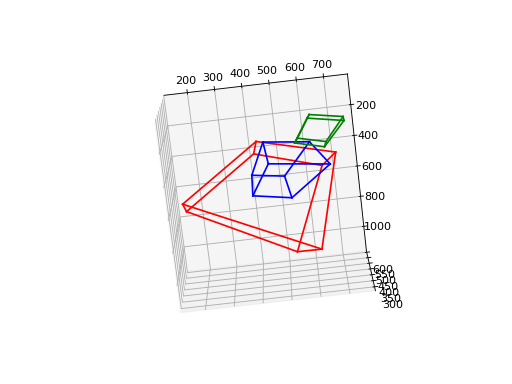

In [46]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for ivica in iviceModem:
    ax.plot3D([rekonstruisane400[ivica[0] - 1][0], rekonstruisane400[ivica[1] - 1][0]], [rekonstruisane400[ivica[0] - 1][1], rekonstruisane400[ivica[1] - 1][1]], [rekonstruisane400[ivica[0] - 1][2], rekonstruisane400[ivica[1] - 1][2]], 'red')

for ivica in iviceCaj:
    ax.plot3D([rekonstruisane400[ivica[0] - 1][0], rekonstruisane400[ivica[1] - 1][0]], [rekonstruisane400[ivica[0] - 1][1], rekonstruisane400[ivica[1] - 1][1]], [rekonstruisane400[ivica[0] - 1][2], rekonstruisane400[ivica[1] - 1][2]], 'blue')

for ivica in iviceKeks:
    ax.plot3D([rekonstruisane400[ivica[0] - 1][0], rekonstruisane400[ivica[1] - 1][0]], [rekonstruisane400[ivica[0] - 1][1], rekonstruisane400[ivica[1] - 1][1]], [rekonstruisane400[ivica[0] - 1][2], rekonstruisane400[ivica[1] - 1][2]], 'green')